## This is a Jupyter notebook to set up and run a nudged elastic band (NEB) calculation using the MACE-MP-0 interatomic potential and the Atomic Simulation Environment (ASE).

Steps 1-3 of creating an input supercell structure are covered in the notebook mace_ase_optimise_lifepo4.ipynb.

Sections that require user input for a specific system are shown as ################## User input ################# blocks.

### References:

#### ASE:

https://wiki.fysik.dtu.dk/ase/ase/io/io.html

https://wiki.fysik.dtu.dk/ase/ase/neb.html

https://wiki.fysik.dtu.dk/ase/tutorials/neb/diffusion.html

#### MACE:

Code: https://github.com/ACEsuit/mace-mp?tab=readme-ov-file

Paper: Batatia, I., Benner, P., Chiang, Y., Elena, A.M., Kovács, D.P., Riebesell, J., Advincula, X.R., Asta, M., Baldwin, W.J., Bernstein, N. and Bhowmik, A., 2023. A foundation model for atomistic materials chemistry. arXiv preprint arXiv:2401.00096.

#### NEB:

Henkelman, G., Uberuaga, B.P. and Jónsson, H., 2000. A climbing image nudged elastic band method for finding saddle points and minimum energy paths. The Journal of chemical physics, 113(22), pp.9901-9904.

Henkelman, G. and Jónsson, H., 2000. Improved tangent estimate in the nudged elastic band method for finding minimum energy paths and saddle points. The Journal of chemical physics, 113(22), pp.9978-9985.

https://theory.cm.utexas.edu/vtsttools/neb.html

## Step 0: Import some modules from ASE and MACE

In [2]:
import ase
from ase.optimize import LBFGS
from ase.io import read, write
from ase.filters import FrechetCellFilter
from ase.mep import NEB, NEBTools
from ase.build import make_supercell
from ase.io.trajectory import Trajectory
from ase import Atoms
from ase.constraints import FixAtoms
from mace.calculators import mace_mp
from ase.visualize import view

import matplotlib.pyplot as plt

Read in the 1x2x2 supercell structure of LiFePO4 that we created previously.

In [3]:
fully_occupied_super=read('supercell.cif',format='cif')
view(fully_occupied_super) 

<Popen: returncode: None args: ['/Library/Frameworks/Python.framework/Versio...>

## Step 4: Create two end member minima structures

Visualise the structure in ase gui with the view(fully_occupied_super) command (or another structure visualiser such as VESTA) and find the atom indices(list position) of two neighbouring Li sites along the b-axis of the cell. Bear in mind that ase uses 'python counting' so atoms 30 and 85 in ASE are atoms 31 and 86 in Vesta. Once we have selected the two neighbouring Li sites, we can delete them from the cell with 'del'.

In [3]:
################## User input #################
atom_1=30   
atom_2=85   
################## User input #################

In [4]:
pos_1=fully_occupied_super[atom_1].scaled_position
pos_2=fully_occupied_super[atom_2].scaled_position

del fully_occupied_super[[atom_1,atom_2]]

view(fully_occupied_super, viewer='x3d')

Now we need to create two new supercells (min_cell_1 and min_cell_2) with a Li atom in the initial (pos_1) and final (pos_2) positions that we just identified. We do this by adding Li back into the structure we just created containing two Li vacancies. Once we have added a Li to the end of the file ([-1]), we optimise the atomic positions in the two new supercells. 

In [5]:
################## User input #################
insert_atom_type='Li'
################## User input #################

In [6]:
min_cell_1=fully_occupied_super.copy()
min_cell_1.append(insert_atom_type)
min_cell_1[-1].scaled_position=pos_1
min_cell_1.calc=mace_mp(default_dtype="float32") #use float64 for higher precision

bfgs=LBFGS(min_cell_1)
traj = Trajectory('min_cell_1_opt.traj', 'w', min_cell_1)
bfgs.attach(traj)
bfgs.run(fmax=0.01)
write('vac_pos_1.cif',fully_occupied_super,format='cif')
view(min_cell_1, viewer='x3d')

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 16:11:54     -759.206726        1.774770
LBFGS:    1 16:11:57     -759.414429        0.615212
LBFGS:    2 16:12:01     -759.489624        0.512618
LBFGS:    3 16:12:04     -759.557556        0.337190
LBFGS:    4 16:12:09     -759.597656        0.271241
LBFGS:    5 16:12:11     -759.621399        0.221883
LBFGS:    6 16:12:14     -759.636230        0.191616
LBFGS:    7 16:12:17     -759.652954        0.160077
LBFGS:    8 16:12:20     -759.666504        0.139420
LBFGS:    9 16:12:22     -759.674622        0.140361
LBFGS:   10 16:12:25     -759.679443        0.134428
LBFGS:   11 16:12:28     -759.684509        0.114731
LBF

In [7]:
min_cell_2=fully_occupied_super.copy()
min_cell_2.append(insert_atom_type)
min_cell_2[-1].scaled_position=pos_2
min_cell_2.calc=mace_mp(default_dtype="float32") #use float64 for higher precision

bfgs=LBFGS(min_cell_2)
traj = Trajectory('min_cell_2_opt.traj', 'w', min_cell_2)
bfgs.attach(traj)
bfgs.run(fmax=0.01)
write('vac_pos_2.cif',fully_occupied_super,format='cif')
view(min_cell_2, viewer='x3d')

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 16:13:40     -759.206726        1.774769
LBFGS:    1 16:13:43     -759.414429        0.615214
LBFGS:    2 16:13:46     -759.489624        0.512617
LBFGS:    3 16:13:49     -759.557556        0.337188
LBFGS:    4 16:13:52     -759.597656        0.271257
LBFGS:    5 16:13:55     -759.621399        0.221894
LBFGS:    6 16:13:57     -759.636230        0.191600
LBFGS:    7 16:14:00     -759.652954        0.160097
LBFGS:    8 16:14:03     -759.666504        0.139415
LBFGS:    9 16:14:06     -759.674622        0.140365
LBFGS:   10 16:14:09     -759.679443        0.134425
LBFGS:   11 16:14:11     -759.684509        0.114719
LBF

## Step 5: Set up NEB calculation
We now have our two optimised minima structures for our NEB calculation. Assuming that we have produced trajectory (.traj) files during the optimisation, we can read these in to give us our initial and final structures for the NEB (we can also directly use min_cell_1 and min_cell_2 if we want to run everything in one go).

In [8]:
initial_struct=read('min_cell_1_opt.traj')
final_struct=read('min_cell_2_opt.traj')

Now we can set up the NEB band. We need to specify how many intermediate structures (images) to include between our initial and final minima structures. The atomic positions of the initial structure are copied to form the intermediate images. The 'Climbing Image' variant of NEB (CI-NEB) can easily be turned on by setting climb=True.  

In [9]:
################## User input #################
number_of_neb_images=3
################## User input #################

In [10]:
images = [initial_struct]
images += [initial_struct.copy() for i in range(number_of_neb_images)]
images += [final_struct]
neb = NEB(images,climb=False)

The positions of the atoms in the intermediate images now need to be linearly interpolated between the initial and final state. Once the positions in the intermediate images have been correctly set up, we need to attach the mace calculator separately to each image. 

In [11]:
neb.interpolate()

for image in images[1:number_of_neb_images+1]:
    image.calc = mace_mp()

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


## Step 6: Run NEB calculation and analyze results
It's now time to run our NEB! Just as we did for the geometry optimisation, we assign an optimiser and 'run'. The full trajectory of the NEB run for all images is saved as 'neb.traj' which we can visualise in ase gui. 

In [12]:
optimizer = LBFGS(neb, trajectory='neb.traj')
optimizer.run(fmax=0.05)

       Step     Time          Energy          fmax
LBFGS:    0 16:15:26     -758.529358        3.017757
LBFGS:    1 16:15:35     -758.786743        1.811855
LBFGS:    2 16:15:44     -759.023621        1.313481
LBFGS:    3 16:15:53     -759.140015        0.985742
LBFGS:    4 16:16:02     -759.198242        0.854032
LBFGS:    5 16:16:10     -759.237183        0.814910
LBFGS:    6 16:16:19     -759.282654        0.624284
LBFGS:    7 16:16:27     -759.325012        0.508526
LBFGS:    8 16:16:35     -759.352844        0.467780
LBFGS:    9 16:16:44     -759.369324        0.370375
LBFGS:   10 16:16:52     -759.388367        0.350324
LBFGS:   11 16:17:00     -759.412537        0.325942
LBFGS:   12 16:17:09     -759.428162        0.287230
LBFGS:   13 16:17:17     -759.438782        0.219660
LBFGS:   14 16:17:27     -759.448242        0.206194
LBFGS:   15 16:17:35     -759.454529        0.139345
LBFGS:   16 16:17:43     -759.458313        0.155462
LBFGS:   17 16:17:51     -759.461121        0.12

True

Now lets make a nice plot. NEBTools reads the information from the neb trajectory file when the calculation finishes and produces a png figure. 

<Popen: returncode: None args: ['/Library/Frameworks/Python.framework/Versio...>

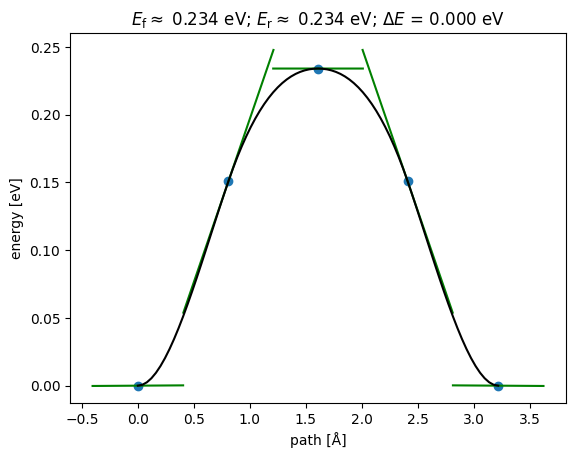

In [13]:
fname='neb.traj@-'+str(number_of_neb_images+2)+':'
images = read(fname)
nebtools = NEBTools(images)
Ef, dE = nebtools.get_barrier()
Ef, dE = nebtools.get_barrier(fit=False)
max_force = nebtools.get_fmax()
fig = nebtools.plot_band()
fig.savefig('vac_barrier.png')
view(images)